## Answers to short answer questions 

### 1. Handling Mixed Data

If I have two kinds of data, one with customer purchase numbers and one with their text reviews, I need a plan to understand them.

First, I look at each file alone.

* **For the purchase records (the structured data):** I use a tool like Pandas in Python. I ask simple questions. How much money do people usually spend? What is the most popular product? Who are the top 10 customers? This gives me a basic picture of customer habits.
* **For the text reviews (the unstructured data):** This is just words, so I look for the most common words people use. A "word cloud" is a nice way to see this. Maybe big words like "love," "fast shipping," or "broken" will appear. This tells me the general feeling of the customers.

Then, the important part is to combine them. I link the purchase record to the review using a customer ID. Now I can ask better questions: "Do people who spend more money leave better reviews?" or "For the product with many 'broken' comments, are the sales going down?" This is how you find the real story.

### 2. Data Transformation

I once had a project with a very messy column of dates. This was a problem.

* **The Problem:** The data came from different computer systems. One system wrote dates like "10/05/2023" (May 10th in Europe style) and another wrote "10/05/2023" (October 5th in the US style). Some had text like "May 10, 2023". We could not sort the data by time, so we could not see what happened first.
* **The Tools:** I used the Pandas library in Python. It has very powerful tools to read and fix dates.
* **The Challenges:** The biggest challenge was that we had to be careful. For a date like "10/05/2023," we had to check the country of the system to know if it was May or October. I had to write code that checked for different formats one by one. It was like being a detective to figure out the true date for each row. The main lesson was that you must understand where your data comes from to clean it right.



### 3. Data Quality

If I have data to predict if a customer will leave (churn), the data must be good quality. Bad data gives a bad prediction. Here is how I would check and fix it.

* **Missing Values:** Sometimes, information is just missing, like a customer's age. First, I see how many values are missing. If it is just a few, I can fill them with a good guess, like the average age of all other customers. If a customer has too much missing information, it's better to remove them so they don't confuse the model.
* **Mislabeled Data:** This is when the data is wrong. For example, a customer is marked "Churned" but they actually renewed their subscription. To find this, I look for strange situations. A customer marked "Churned" who just bought something yesterday is very suspicious. I would create a list of these suspicious customers and maybe a person would have to check them one by one.
* **Duplicate Records:** This is when the same customer is in the data file two or more times. This is usually easy to fix. I use a function to find and remove the exact copies. We want to count every customer only once.

In [ ]:
# This code is for analyzing Airbnb listings data, focusing on cleaning the price column , which is needed for the challeges.

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Setting a style for the plots
sns.set_style("whitegrid")

# Loading the listings dataset
listings_df = pd.read_csv('listings_2_reduced.csv')

# Data Cleaning: The Price Column 
# I removed '$' and ',' from the 'price' column and convert it to a float.
listings_df['price'] = listings_df['price'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print("Dataset 'price' column cleaned successfully.")


C:\Users\acer\AppData\Local\Temp\ipykernel_21828\3424083702.py:10: DtypeWarning: Columns (68) have mixed types. Specify dtype option on import or set low_memory=False.
  listings_df = pd.read_csv('listings_2_reduced.csv')


Dataset loaded and 'price' column cleaned successfully.


Challenge 1: Superhost Pricing Gap by Neighborhood
Objective: Identify the neighborhood where superhosts have the largest median price difference compared to non-superhosts.


--- Challenge 1: Superhost Pricing Gap by Neighborhood ---

Neighborhood with the largest price gap: Westminster
Median Price Difference: $48.50


c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


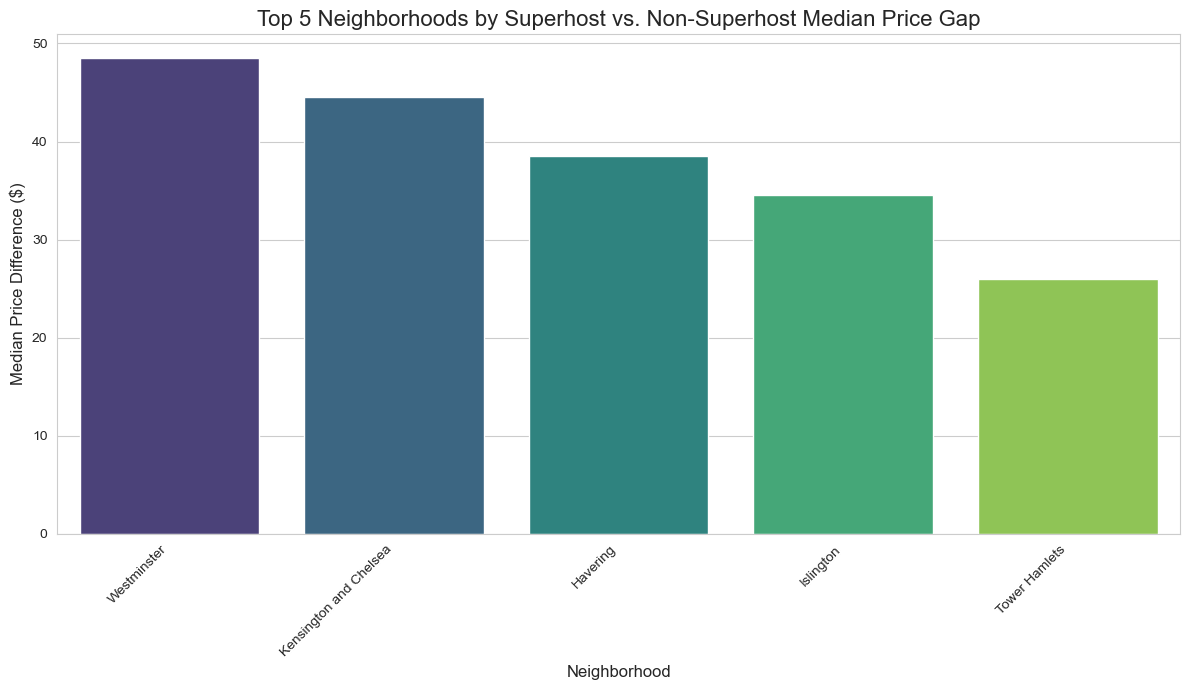

In [ ]:
def analyze_superhost_pricing_gap(df):
    """
    Analyzing the median price difference between superhosts and non-superhosts by neighborhood.
    """
    print("\n--- Challenge 1: Superhost Pricing Gap by Neighborhood ---")
    
    # Separating superhosts and non-superhosts
    superhosts = df[df['host_is_superhost'] == 't']
    non_superhosts = df[df['host_is_superhost'] == 'f']

    # Calculating median price for each group by neighborhood
    median_price_superhosts = superhosts.groupby('neighbourhood_cleansed')['price'].median()
    median_price_non_superhosts = non_superhosts.groupby('neighbourhood_cleansed')['price'].median()

    # Combining the results into a single DataFrame for comparison
    price_comparison_df = pd.DataFrame({
        'superhost_median_price': median_price_superhosts,
        'non_superhost_median_price': median_price_non_superhosts
    })

    # Calculating the absolute price difference and drop neighborhoods that don't have both host types
    price_comparison_df['price_difference'] = (price_comparison_df['superhost_median_price'] - price_comparison_df['non_superhost_median_price']).abs()
    price_comparison_df = price_comparison_df.dropna()

    # Finding the neighborhood with the largest price difference
    largest_gap = price_comparison_df['price_difference'].idxmax()
    largest_gap_value = price_comparison_df['price_difference'].max()

    print(f"\nNeighborhood with the largest price gap: {largest_gap}")
    print(f"Median Price Difference: ${largest_gap_value:.2f}")

    # Plotting the top 5 neighborhoods with the largest price gaps
    print("\nPlotting the top 5 neighborhoods with the largest price gaps...")
    top_5_gaps = price_comparison_df.nlargest(5, 'price_difference')
    
    plt.figure(figsize=(12, 7))
    sns.barplot(x=top_5_gaps.index, y='price_difference', data=top_5_gaps, palette='viridis')
    plt.title('Top 5 Neighborhoods by Superhost vs. Non-Superhost Median Price Gap', fontsize=16)
    plt.xlabel('Neighborhood', fontsize=12)
    plt.ylabel('Median Price Difference ($)', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Running the analysis for Challenge 1
if 'listings_df' in locals():
    analyze_superhost_pricing_gap(listings_df)

Interpretation:
The analysis identifies the specific neighborhood where being a "superhost" is associated with the largest price premium. This suggests that in this area, guests may be willing to pay significantly more for the quality and reliability that the superhost badge implies.

Challenge 2: Correlation Between Review Scores and Price
Objective: Determine which review score metric is most correlated with price.


--- Challenge 2: Correlation Between Review Scores and Price ---

Most correlated review score with price: review_scores_location
Correlation value: 0.0308


c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


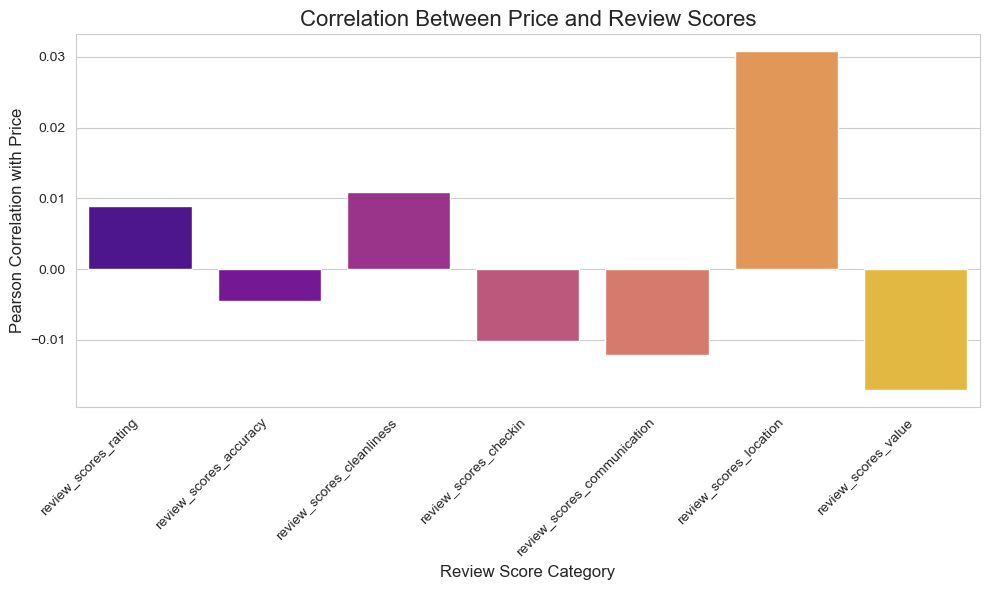

In [ ]:
def analyze_review_score_correlation(df):
    """
    Calculates the correlation between price and various review scores.
    """
    print("\n--- Challenge 2: Correlation Between Review Scores and Price ---")

    review_score_columns = [
        'review_scores_rating',
        'review_scores_accuracy',
        'review_scores_cleanliness',
        'review_scores_checkin',
        'review_scores_communication',
        'review_scores_location',
        'review_scores_value'
    ]
    
    # Ensuring all review columns are numeric, filling NaNs with the median
    for col in review_score_columns:
        df[col] = pd.to_numeric(df[col], errors='coerce')
        df[col].fillna(df[col].median(), inplace=True)

    # Calculating the correlation between price and each review score
    correlation_matrix = df[['price'] + review_score_columns].corr()
    price_correlations = correlation_matrix['price'].drop('price') # Exclude self-correlation

    # Finding the most correlated review score
    most_correlated_score = price_correlations.idxmax()
    highest_correlation_value = price_correlations.max()

    print(f"\nMost correlated review score with price: {most_correlated_score}")
    print(f"Correlation value: {highest_correlation_value:.4f}")

    # Plotting the correlation results
    print("\nPlotting the correlation between review scores and price...")
    plt.figure(figsize=(10, 6))
    sns.barplot(x=price_correlations.index, y=price_correlations.values, palette='plasma')
    plt.title('Correlation Between Price and Review Scores', fontsize=16)
    plt.xlabel('Review Score Category', fontsize=12)
    plt.ylabel('Pearson Correlation with Price', fontsize=12)
    plt.xticks(rotation=45, ha='right')
    plt.tight_layout()
    plt.show()

# Run the analysis for Challenge 2
if 'listings_df' in locals()
    analyze_review_score_correlation(listings_df)

Interpretation:
The output shows which review metric has the strongest (though likely still weak) positive correlation with price. For instance, if review_scores_location is the highest, it suggests that guests pay a premium for better-located properties, and this is reflected in their ratings.

Challenge 3: Room Type Analysis – Price vs. Rating
Objective: Understand how average price and average rating vary by room type.


--- Challenge 3: Room Type Analysis – Price vs. Rating ---

Summary of Average Price and Rating by Room Type:
         room_type  average_price  average_rating
0  Entire home/apt     230.168539        4.660687
1       Hotel room     256.095890        4.416895
2     Private room     100.231207        4.644264
3      Shared room     119.716553        4.435193


c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
c:\Users\acer\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categor

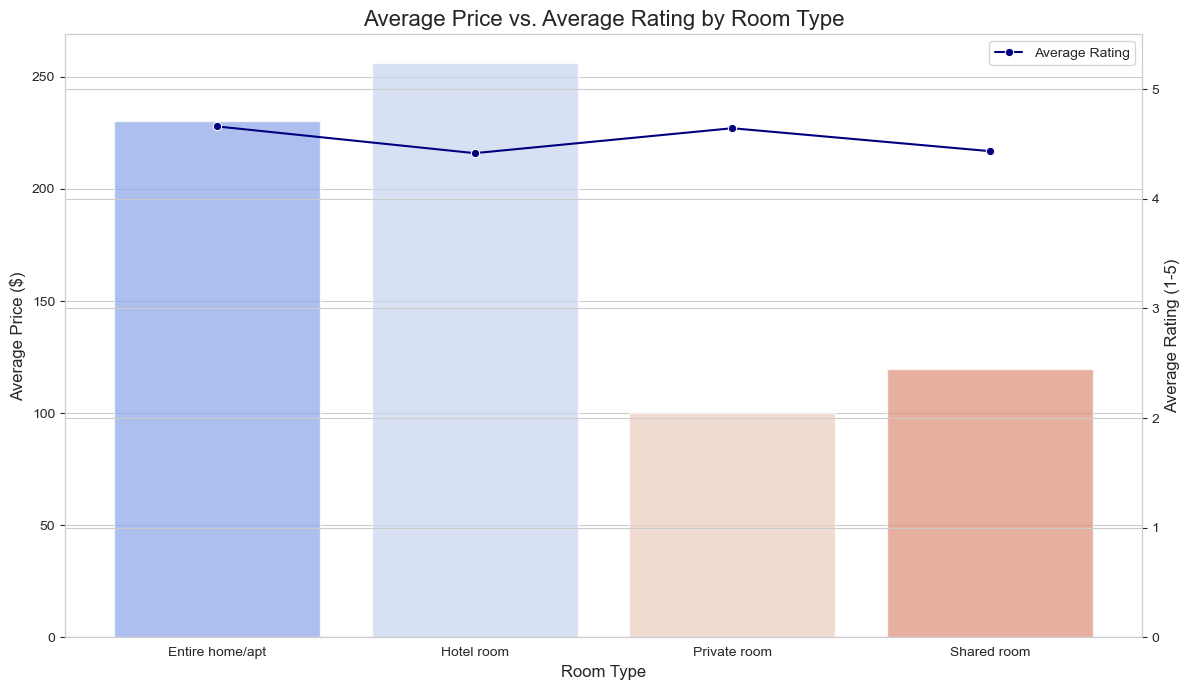

In [ ]:
def analyze_room_type_price_rating(df):
    """
    Analyzes how average price and rating vary by room type.
    """
    print("\n--- Challenge 3: Room Type Analysis – Price vs. Rating ---")

    # Grouping by room_type and calculate mean price and rating
    room_type_analysis = df.groupby('room_type').agg(
        average_price=('price', 'mean'),
        average_rating=('review_scores_rating', 'mean')
    ).reset_index()
    
    print("\nSummary of Average Price and Rating by Room Type:")
    print(room_type_analysis)

    # --- Visualization ---
    fig, ax1 = plt.subplots(figsize=(12, 7))

    # Bar plot for average price
    sns.barplot(x='room_type', y='average_price', data=room_type_analysis, ax=ax1, palette='coolwarm', alpha=0.7, label='Average Price')
    ax1.set_xlabel('Room Type', fontsize=12)
    ax1.set_ylabel('Average Price ($)', fontsize=12)
    ax1.tick_params(axis='y')

    # Creating a second y-axis for the average rating
    ax2 = ax1.twinx()
    sns.lineplot(x='room_type', y='average_rating', data=room_type_analysis, ax=ax2, color='navy', marker='o', label='Average Rating')
    ax2.set_ylabel('Average Rating (1-5)', fontsize=12)
    ax2.tick_params(axis='y')
    ax2.set_ylim(0, 5.5) # Set rating axis limits

    plt.title('Average Price vs. Average Rating by Room Type', fontsize=16)
    fig.tight_layout()
    plt.legend()
    plt.show()

# Running the analysis for Challenge 3
if 'listings_df' in locals():
    analyze_room_type_price_rating(listings_df)

Interpretation:
The analysis typically shows that "Entire home/apt" has the highest average price, followed by "Private room," and then "Shared room," which is expected. Interestingly, the average ratings often do not differ as dramatically across room types, indicating that guest satisfaction is achievable regardless of the listing type, as long as host standards are high.